In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
##from pyemma import msm
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D
###from pyemma import msm
%matplotlib inline

In [2]:
data=pd.read_csv("/../walmart.csv")

In [3]:
data.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [4]:
col=['Unnamed: 0']
data.drop(col,axis=1)

,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,0,13.0,26240.14,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421566,45,2012-10-26,0,16.0,2660.02,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421567,45,2012-10-26,0,32.0,4131.54,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421568,45,2012-10-26,0,83.0,717.82,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    421570 non-null  int64  
 1   Store         421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   IsHoliday     421570 non-null  int64  
 4   Dept          421570 non-null  float64
 5   Weekly_Sales  421570 non-null  float64
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     421570 non-null  float64
 9   MarkDown2     421570 non-null  float64
 10  MarkDown3     421570 non-null  float64
 11  MarkDown4     421570 non-null  float64
 12  MarkDown5     421570 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  Type          421570 non-null  int64  
 16  Size          421570 non-null  int64  
dtypes: float64(11), int64(5), object(1)
memory usage

In [6]:
data.isnull().sum()

Unnamed: 0      0
Store           0
Date            0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [7]:
data.describe()

,Unnamed: 0,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,211611.321278,22.200546,0.070358,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,2.410088,136727.915739
std,122195.149363,12.785297,0.255750,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,0.000000,1.000000,0.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,34875.000000
25%,105782.250000,11.000000,0.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,2.000000,93638.000000
50%,211603.500000,22.000000,0.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,3.000000,140167.000000
75%,317424.750000,33.000000,0.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,3.000000,202505.000000
max,423285.000000,45.000000,1.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,3.000000,219622.000000


In [8]:
data.Date.min()

'2010-02-05'

In [9]:
data.Date.max()

'2012-10-26'

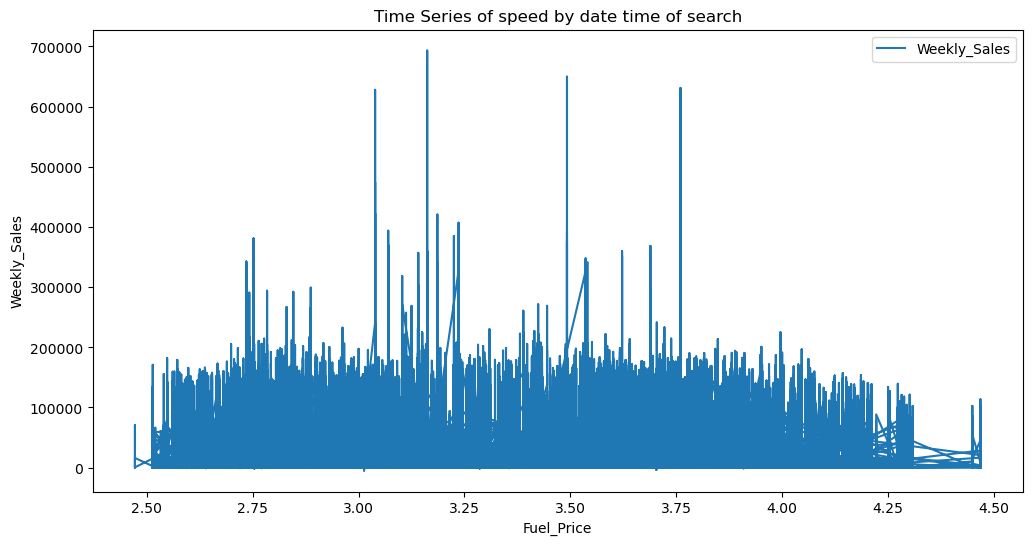

In [10]:
# plot the data
data.plot(x='Fuel_Price', y='Weekly_Sales', figsize=(12,6))
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly_Sales')
plt.title('Time Series of speed by date time of search');

# Clustering-Based Anomaly Detection

## K-Nearest Neighbors Classifier

**KNN is a widely used clustering algorithm. It creates 'k' similar clusters of data points. Data instances that fall outside of these groups could potentially be marked as anomalies.**

In [11]:
from sklearn.neighbors import NearestNeighbors

In [12]:
df = data[['Date', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']]

In [13]:
df.set_index('Date', inplace=True)

In [14]:
X = df.values

In [15]:
# instantiate model
nbrs = NearestNeighbors(n_neighbors = 3)
# fit model
nbrs.fit(X)

NearestNeighbors(n_neighbors=3)

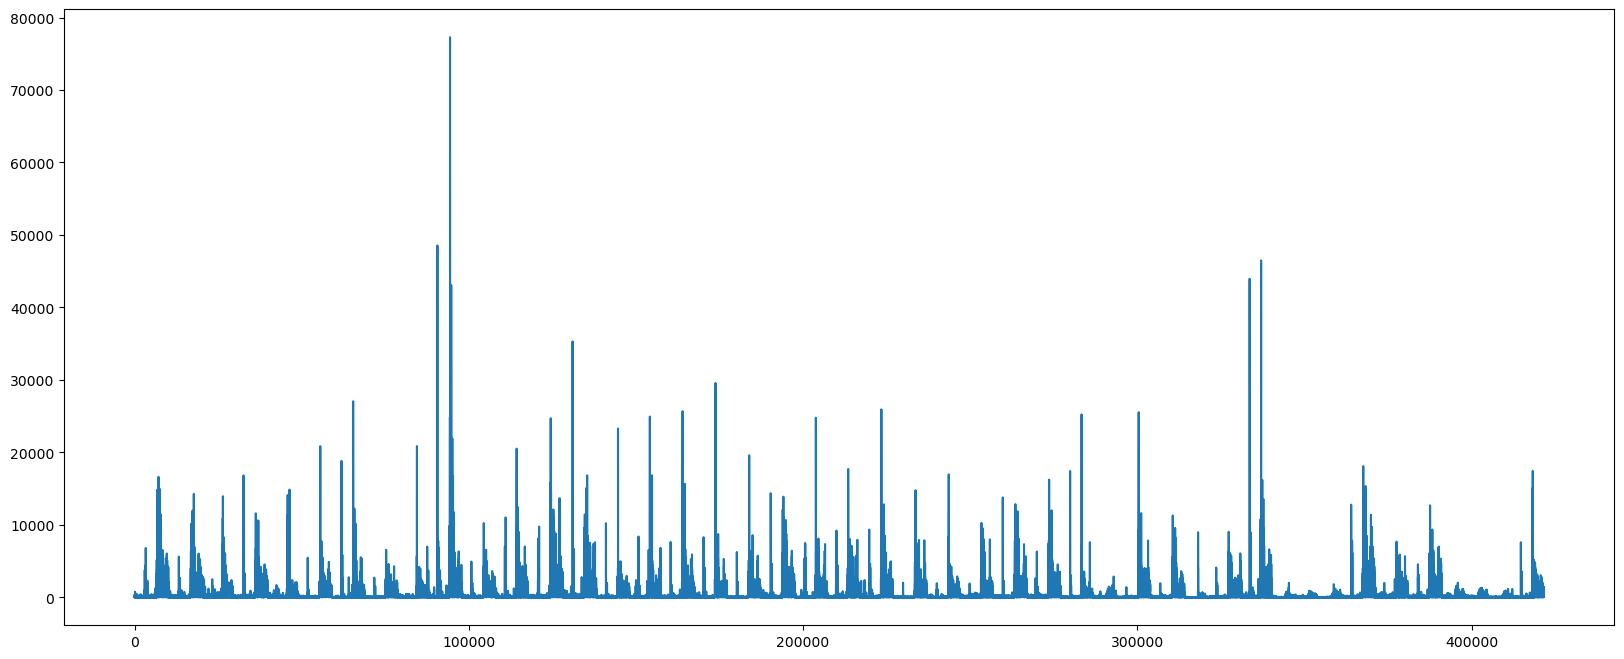

In [16]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
# plot mean of k-distances of each observation
plt.figure(figsize=(20,8))
plt.plot(distances.mean(axis =1))

In [17]:
# visually determine cutoff values > 35000
outlier_index = np.where(distances.mean(axis = 1) > 35000)
outlier_index

(array([ 90609,  94385,  94743, 131045, 333606, 337045]),)

In [18]:
# filter outlier values
outlier_values = data.iloc[outlier_index]
outlier_values

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
90609,90960,10,2010-11-26,1,72.0,693099.36,55.33,3.162,0.00,0.00,0.00,0.00,0.00,126.669267,9.003,2,126512
94385,94736,10,2011-11-25,1,72.0,630999.19,60.68,3.760,174.72,329.00,141630.61,79.00,1009.98,129.836400,7.874,2,126512
94743,95094,10,2011-12-30,1,72.0,156431.46,48.92,3.428,7676.36,104519.54,179.82,1573.87,3732.93,130.071032,7.874,2,126512
131045,131552,14,2010-11-26,1,72.0,474330.10,46.15,3.039,0.00,0.00,0.00,0.00,0.00,182.783277,8.724,3,200898
333606,334932,35,2010-11-26,1,72.0,627962.93,46.67,3.039,0.00,0.00,0.00,0.00,0.00,136.689571,8.763,2,103681
337045,338371,35,2011-11-25,1,72.0,649770.18,47.88,3.492,1333.24,0.00,58563.24,20.97,6386.86,140.421786,8.745,2,103681


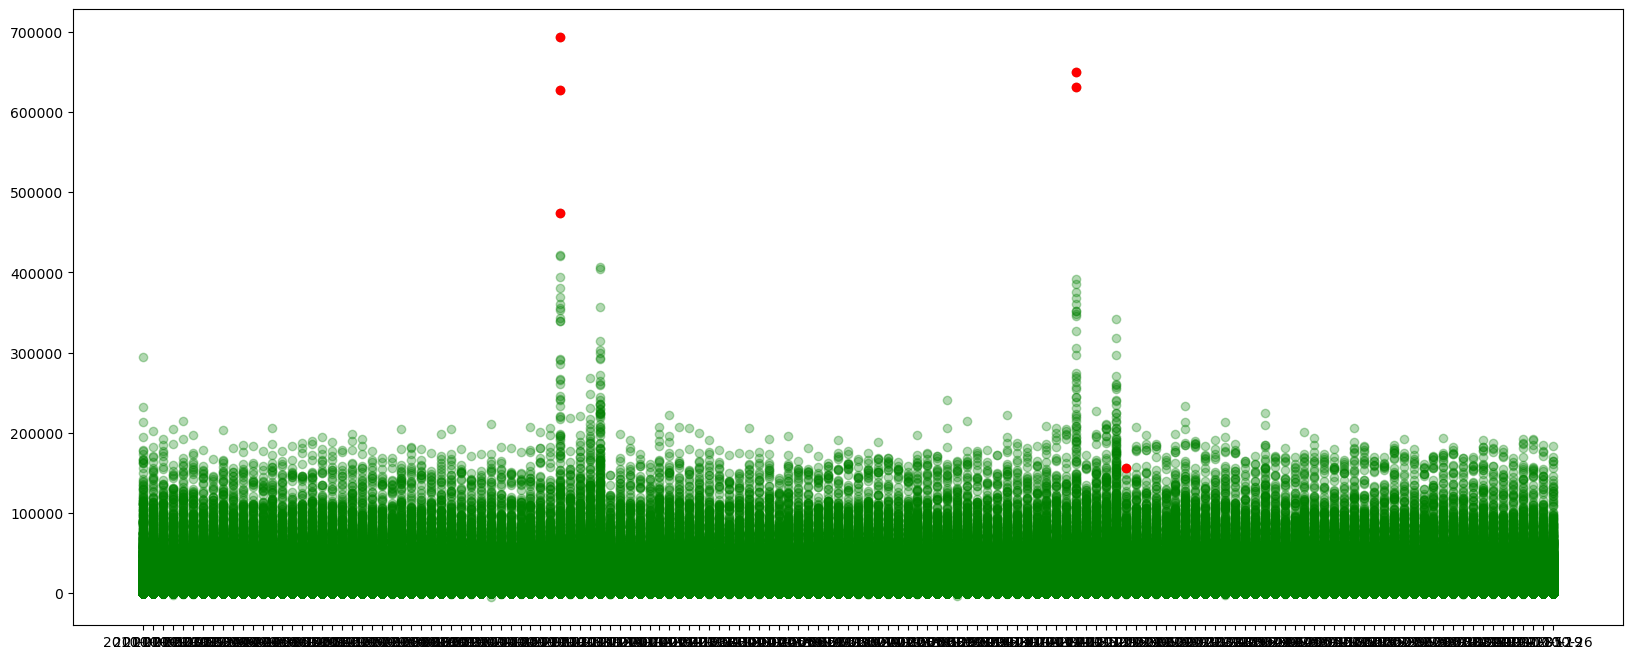

In [19]:
# plot data
plt.figure(figsize=(20,8))
plt.scatter(df.index,data["Weekly_Sales"] ,color = "g",alpha=0.3)
# plot outlier values (where outlier values= df.iloc[outlier_index])
otlr_val = df.iloc[outlier_index]
plt.scatter(otlr_val.index,otlr_val["Weekly_Sales"], color = "r")

In [20]:
from sklearn.ensemble import IsolationForest

In [ ]:
model=IsolationForest(n_estimators=1000,max_samples='auto',contamination=float(0.2),max_features=1.0)
model.fit(data[["Weekly_Sales"]])

In [ ]:
df2 = data.copy()

In [ ]:
df2['scores']=model.decision_function(df2[['Weekly_Sales']])
df2['anomaly']=model.predict(df[['Weekly_Sales']])
df2.head(20)

In [ ]:
df2[df2['anomaly']== -1]

In [ ]:
# percantage. of Outliers
df2[df2['anomaly']== -1].shape[0]/df.shape[0]*100

In [ ]:
model=IsolationForest(n_estimators=1000,max_samples='auto',contamination=float(0.2),max_features=14)
model.fit(df)

In [ ]:
df3 = df.copy()

In [ ]:
df3['scores']=model.decision_function(df)
df3['anomaly']=model.predict(df)
df3.head(20)df3['scores']=model.decision_function(df)
df3['anomaly']=model.predict(df)
df3.head(20)

In [ ]:
df3[df3['anomaly']== -1]

In [ ]:
# percantage. of Outliers
df3[df3['anomaly']== -1].shape[0]/df.shape[0]*100